In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler   # 特征缩放
from sklearn.metrics import accuracy_score         # 评估分类器性能
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import AdaBoostClassifier
from catboost import CatBoostClassifier
import lightgbm as lgb
import xgboost as xgb

In [4]:
#加载数据集
all_transaction = pd.read_csv("UCI_Credit_Card.csv")
all_transaction.shape

(30000, 25)

In [5]:
#显示前五行
all_transaction.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [6]:
all_transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

In [7]:
all_transaction.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [8]:
# 统计数据中的NaN
all_transaction.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

There are 30,000 distinct credit card clients.

The average value for the amount of credit card limit is 167,484. The standard deviation is unusually large, max value being 1M.

Education level is mostly graduate school and university.

Most of the clients are either marrined or single (less frequent the other status).

Average age is 35.5 years, with a standard deviation of 9.2.

As the value 0 for default payment means 'not default' and value 1 means 'default', the mean of 0.221 means that there are 22.1% of credit card contracts that will default next month (will verify this in the next sections of this analysis).

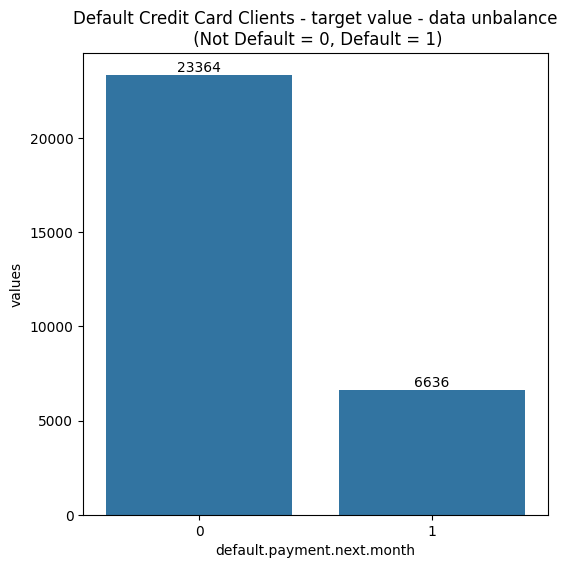

In [9]:
#确认数据平衡程度
payment_counts = all_transaction["default.payment.next.month"].value_counts()
default_counts_df = pd.DataFrame({'default.payment.next.month': payment_counts.index,'values': payment_counts.values})
plt.figure(figsize = (6,6))
plt.title('Default Credit Card Clients - target value - data unbalance\n (Not Default = 0, Default = 1)')
bar_plot = sns.barplot(x = 'default.payment.next.month', y="values", data=default_counts_df)
for p in bar_plot.patches:
    bar_plot.annotate(f'{int(p.get_height())}', 
                      (p.get_x() + p.get_width() / 2., p.get_height()), 
                      ha='center', va='bottom')
plt.show()


A number of 6,636 out of 30,000 (or 22%) of clients will default next month. The data has not a large unbalance with respect of the target value (default.payment.next.month).

In [10]:
print(all_transaction['LIMIT_BAL'].describe())

count      30000.000000
mean      167484.322667
std       129747.661567
min        10000.000000
25%        50000.000000
50%       140000.000000
75%       240000.000000
max      1000000.000000
Name: LIMIT_BAL, dtype: float64


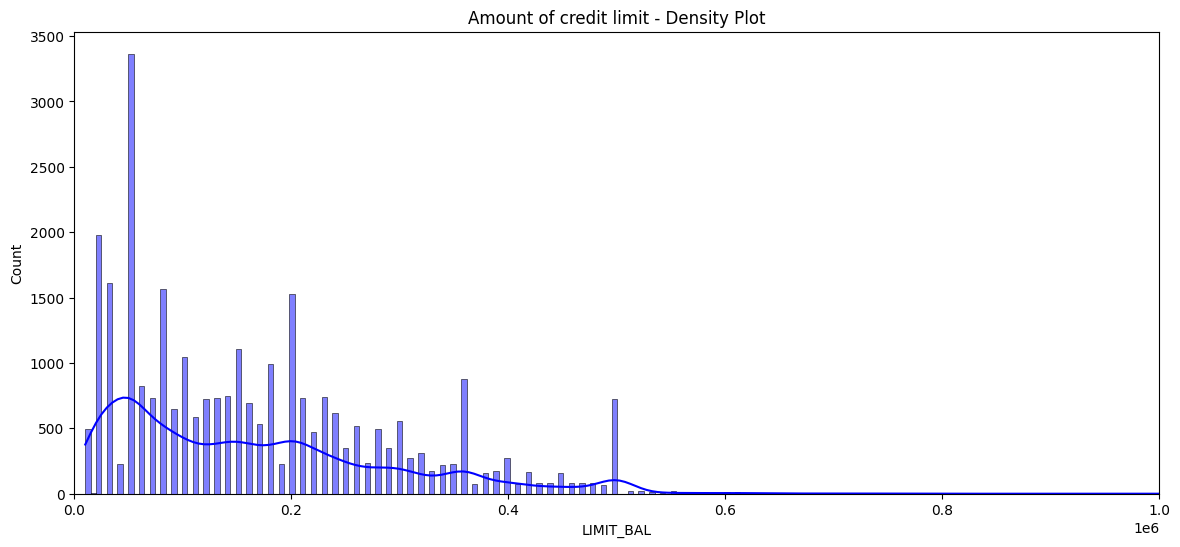

In [11]:
plt.figure(figsize = (14,6))
plt.title('Amount of credit limit - Density Plot')
plt.xlim(0, 1000000)  # 根据你的数据范围进行调整
sns.histplot(all_transaction['LIMIT_BAL'],kde=True,bins=200, color="blue")
plt.show()

## Credit limit vs. sex ##

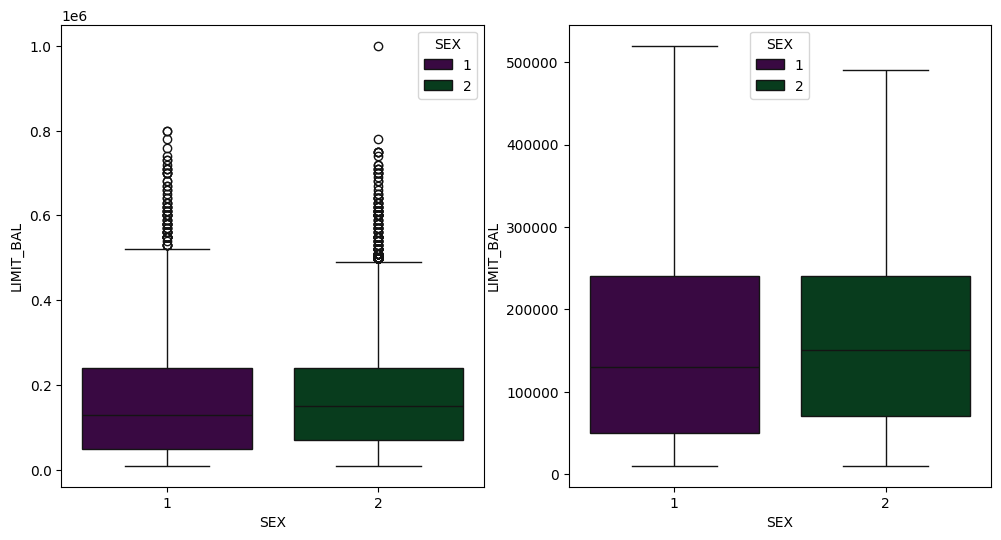

In [14]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
s = sns.boxplot(ax = ax1, x="SEX", y="LIMIT_BAL", hue="SEX",data=all_transaction, palette="PRGn",showfliers=True)
s = sns.boxplot(ax = ax2, x="SEX", y="LIMIT_BAL", hue="SEX",data=all_transaction, palette="PRGn",showfliers=False)
plt.show()

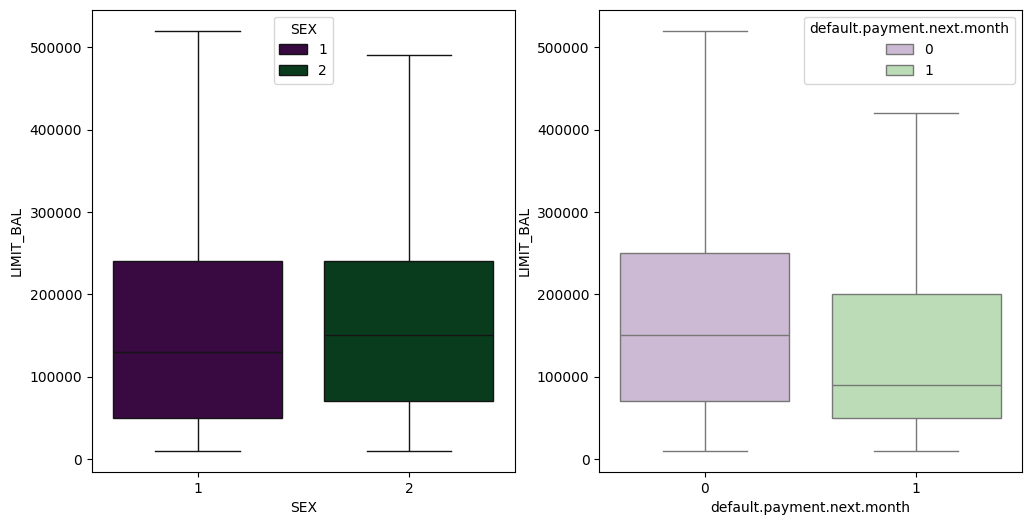

In [15]:
fig, (ax1,ax2) = plt.subplots(ncols = 2, figsize = (12,6))
sns.boxplot(ax = ax1, x="SEX", y="LIMIT_BAL", hue="SEX",data=all_transaction,palette="PRGn",showfliers=False)
sns.boxplot(ax = ax2, x="default.payment.next.month", y="LIMIT_BAL", hue="default.payment.next.month",data=all_transaction,palette="PRGn",showfliers=False)
plt.show()

1 stands for male and 2 for female,The limit credit amount is quite balanced between sexes. The males have a slightly smaller Q2 and larger Q3 and Q4 and a lower mean. The female have a larger outlier max value (1M NT dollars).

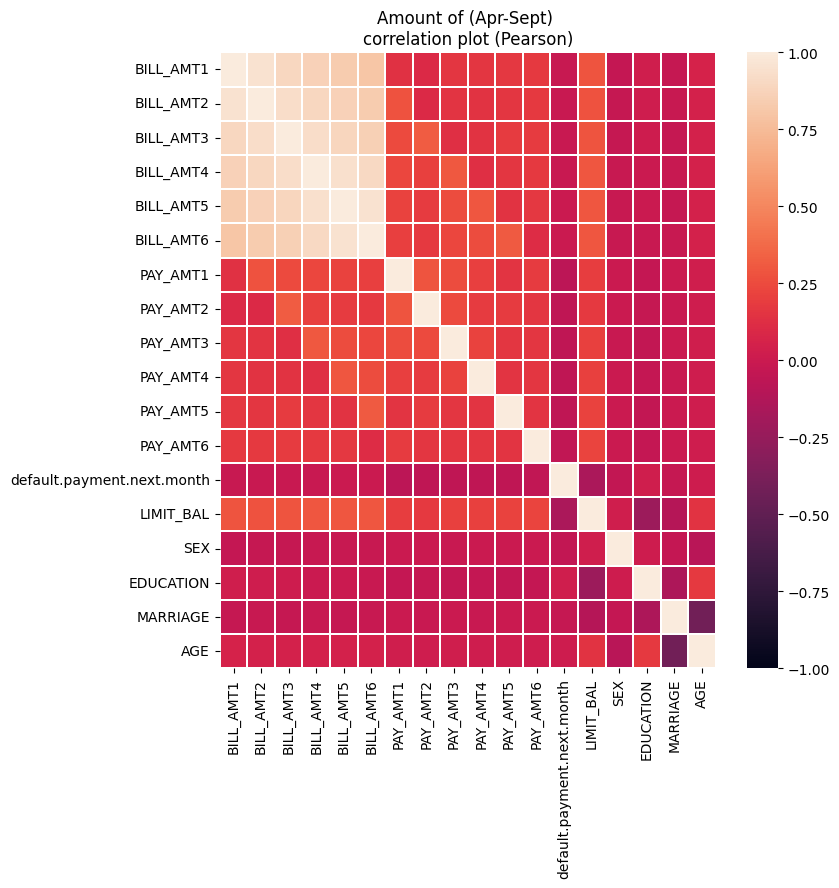

In [16]:
var = ['BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6','PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6','default.payment.next.month','LIMIT_BAL','SEX','EDUCATION','MARRIAGE','AGE']

plt.figure(figsize = (8,8))
plt.title('Amount of (Apr-Sept) \ncorrelation plot (Pearson)')
corr = all_transaction[var].corr()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,linewidths=.1,vmin=-1, vmax=1)
plt.show()

## Define predictors and target values ##

In [17]:
target = 'default.payment.next.month'
predictors = [  'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 
                'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 
                'BILL_AMT1','BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
                'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
VALID_SIZE = 0.2
train_df, val_df = train_test_split(all_transaction, test_size=VALID_SIZE, random_state=2024, shuffle=True )

# 复制一份数据
train_df_bkp = train_df.copy()
val_df_bkp = val_df.copy()

## RandomForestClassifier ##

In [18]:
clf= RandomForestClassifier(n_jobs=-1, random_state=2024, criterion='gini', n_estimators= 100, verbose= False)

In [19]:
# 训练随机森林模型
clf.fit(train_df[predictors], train_df[target].values)

RandomForestClassifier(n_jobs=-1, random_state=2024, verbose=False)

In [20]:
# 用测试集预测
preds = clf.predict(val_df[predictors])

C:\Users\James Han\AppData\Local\Temp\ipykernel_19628\3375696086.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  s.set_xticklabels(s.get_xticklabels(),rotation=90)


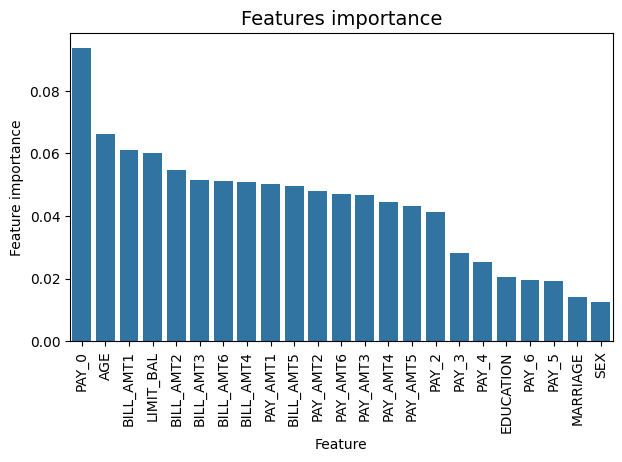

In [21]:
# 可视化参数重要程度
tmp = pd.DataFrame({'Feature': predictors, 'Feature importance': clf.feature_importances_})
tmp = tmp.sort_values(by='Feature importance',ascending=False)
plt.figure(figsize = (7,4))
plt.title('Features importance',fontsize=14)
s = sns.barplot(x='Feature',y='Feature importance',data=tmp)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show() 

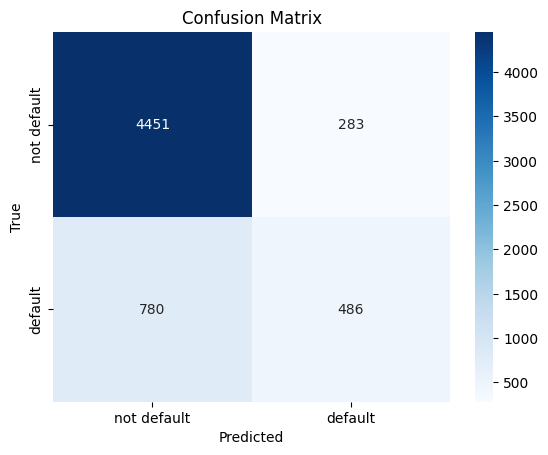

              precision    recall  f1-score   support

           0       0.85      0.94      0.89      4734
           1       0.63      0.38      0.48      1266

    accuracy                           0.82      6000
   macro avg       0.74      0.66      0.69      6000
weighted avg       0.80      0.82      0.81      6000

The ROC-AUC score obtained with RandomForrestClassifier is 0.6620529716460735


In [22]:
# 绘制confusion matrix
cm = cm = confusion_matrix(val_df[target], preds)
# 使用热力图来绘制混淆矩阵
labels = ['not default', 'default']
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',xticklabels=labels, yticklabels=labels)

# 设置标题和坐标轴标签

plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
print(classification_report(val_df[target], preds))
print('The ROC-AUC score obtained with RandomForrestClassifier is', roc_auc_score(val_df[target].values, preds))

Precision = 真正类 / (真正类 + 假正类)   
RandomForestClassifier has a 66% chance of correctly distinguishing between the positive and negative classes.The model is performing better than random guessing (0.5), but there is still significant room for improvement.

In [23]:
#因为非数值型的特征无法直接被随机森林等分类器处理，采用one-hot encoding方法预处理这些特征。
cat_features = ['EDUCATION', 'SEX', 'MARRIAGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
train_f_df = pd.get_dummies(train_df_bkp, columns = cat_features)
val_f_df = pd.get_dummies(val_df_bkp, columns = cat_features)
#确保有相同的columns
train_fa_df, val_fa_df = train_f_df.align(val_f_df, join='outer', axis=1, fill_value=0)
#确认
print("Default of Credit Card Clients train data -  rows:",train_fa_df.shape[0]," columns:", train_fa_df.shape[1])
print("Default of Credit Card Clients val  data -  rows:",val_fa_df.shape[0]," columns:", val_fa_df.shape[1])

Default of Credit Card Clients train data -  rows: 24000  columns: 93
Default of Credit Card Clients val  data -  rows: 6000  columns: 93


In [24]:
train_fa_df.head()

,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,EDUCATION_0,EDUCATION_1,EDUCATION_2,...,PAY_6_8,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,SEX_1,SEX_2,default.payment.next.month
22771,36,49889.0,50326.0,50687.0,37200.0,29838.0,30062.0,False,False,False,...,False,1952.0,1703.0,1444.0,1027.0,1053.0,1077.0,False,True,0
5231,25,18595.0,18326.0,18814.0,19189.0,19233.0,19108.0,False,True,False,...,False,1310.0,1297.0,672.0,837.0,836.0,836.0,True,False,0
19944,34,4677.0,6187.0,4775.0,31188.0,5827.0,3637.0,False,True,False,...,False,6187.0,4775.0,31188.0,0.0,4119.0,7390.0,False,True,0
1213,26,63677.0,64162.0,38141.0,38190.0,38586.0,39962.0,False,False,False,...,False,2000.0,1905.0,1350.0,1388.0,2401.0,1410.0,False,True,0
1690,24,14931.0,15090.0,19239.0,4940.0,93332.0,96112.0,False,True,False,...,False,15090.0,19239.0,4975.0,96151.0,5500.0,4000.0,False,True,0


In [25]:
val_fa_df.head()

,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,EDUCATION_0,EDUCATION_1,EDUCATION_2,...,PAY_6_8,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,SEX_1,SEX_2,default.payment.next.month
21485,24,19891.0,15895.0,17140.0,18457.0,21381.0,18914.0,False,False,True,...,0,0.0,1500.0,1600.0,1646.0,678.0,1000.0,False,True,1
22472,39,117868.0,114483.0,118855.0,125357.0,121853.0,124731.0,False,False,True,...,0,0.0,6216.0,10000.0,0.0,5000.0,4552.0,False,True,1
21709,23,5049.0,1444.0,14019.0,1045.0,12525.0,12219.0,False,False,True,...,0,1444.0,14019.0,1045.0,12525.0,244.0,725.0,False,True,0
10983,35,50456.0,51400.0,0.0,0.0,0.0,0.0,False,True,False,...,0,2400.0,0.0,0.0,0.0,0.0,0.0,False,True,0
24654,39,4138.0,0.0,0.0,0.0,2920.0,0.0,False,True,False,...,0,35.0,0.0,0.0,2920.0,0.0,12140.0,True,False,0


C:\Users\James Han\AppData\Local\Temp\ipykernel_19628\1055095400.py:31: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  s.set_xticklabels(s.get_xticklabels(),rotation=90)


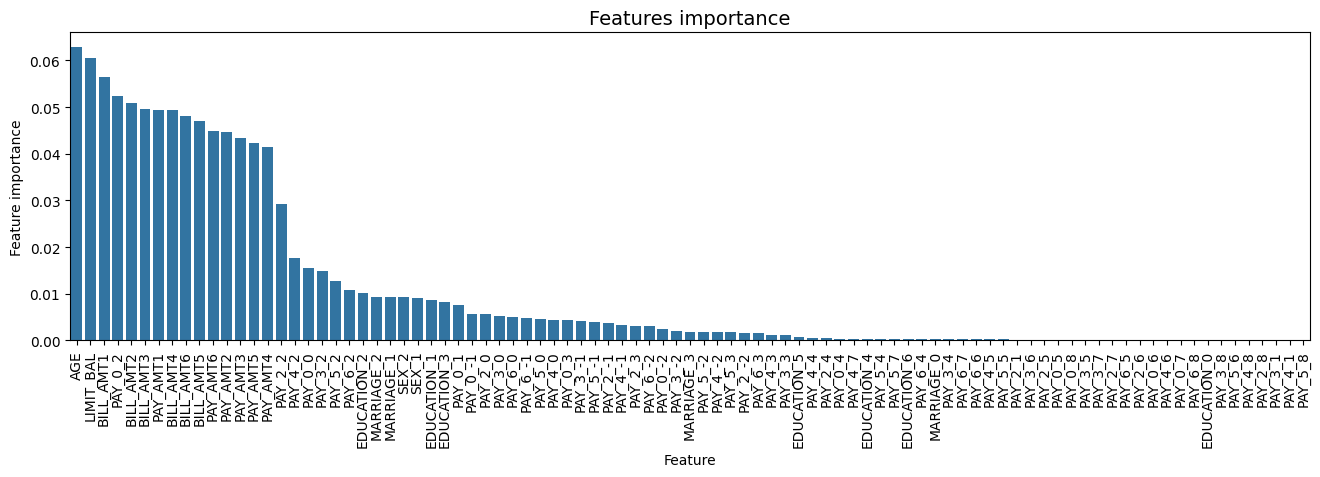

In [26]:
#define new predictors 
predictors_f = ['AGE', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4',
       'BILL_AMT5', 'BILL_AMT6', 'EDUCATION_0', 'EDUCATION_1',
       'EDUCATION_2', 'EDUCATION_3', 'EDUCATION_4', 'EDUCATION_5',
       'EDUCATION_6', 'LIMIT_BAL', 'MARRIAGE_0', 'MARRIAGE_1',
       'MARRIAGE_2', 'MARRIAGE_3', 'PAY_0_-1', 'PAY_0_-2', 'PAY_0_0',
       'PAY_0_1', 'PAY_0_2', 'PAY_0_3', 'PAY_0_4', 'PAY_0_5', 'PAY_0_6',
       'PAY_0_7', 'PAY_0_8', 'PAY_2_-1', 'PAY_2_-2', 'PAY_2_0', 'PAY_2_1',
       'PAY_2_2', 'PAY_2_3', 'PAY_2_4', 'PAY_2_5', 'PAY_2_6', 'PAY_2_7',
       'PAY_2_8', 'PAY_3_-1', 'PAY_3_-2', 'PAY_3_0', 'PAY_3_1', 'PAY_3_2',
       'PAY_3_3', 'PAY_3_4', 'PAY_3_5', 'PAY_3_6', 'PAY_3_7', 'PAY_3_8',
       'PAY_4_-1', 'PAY_4_-2', 'PAY_4_0', 'PAY_4_1', 'PAY_4_2', 'PAY_4_3',
       'PAY_4_4', 'PAY_4_5', 'PAY_4_6', 'PAY_4_7', 'PAY_4_8', 'PAY_5_-1',
       'PAY_5_-2', 'PAY_5_0', 'PAY_5_2', 'PAY_5_3', 'PAY_5_4', 'PAY_5_5',
       'PAY_5_6', 'PAY_5_7', 'PAY_5_8', 'PAY_6_-1', 'PAY_6_-2', 'PAY_6_0',
       'PAY_6_2', 'PAY_6_3', 'PAY_6_4', 'PAY_6_5', 'PAY_6_6', 'PAY_6_7',
       'PAY_6_8', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4',
       'PAY_AMT5', 'PAY_AMT6', 'SEX_1', 'SEX_2']

# 用独热处理后的数据再次进行训练
clf.fit(train_fa_df[predictors_f], train_fa_df[target].values)
# 用测试集预测
preds = clf.predict(val_fa_df[predictors_f])

# 可视化参数重要程度
tmp = pd.DataFrame({'Feature': predictors_f, 'Feature importance': clf.feature_importances_})
tmp = tmp.sort_values(by='Feature importance',ascending=False)
plt.figure(figsize = (16,4))
plt.title('Features importance',fontsize=14)
s = sns.barplot(x='Feature',y='Feature importance',data=tmp)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show() 

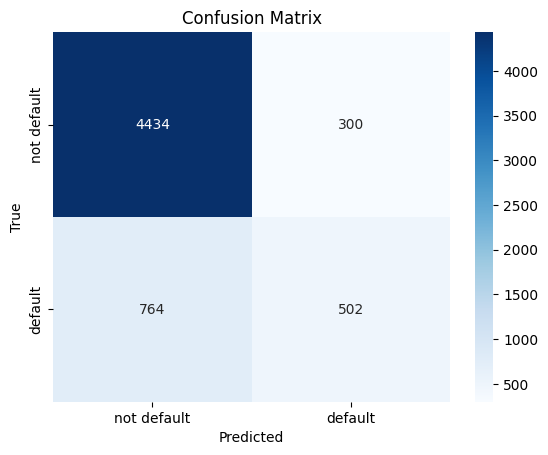

              precision    recall  f1-score   support

           0       0.85      0.94      0.89      4734
           1       0.63      0.40      0.49      1266

    accuracy                           0.82      6000
   macro avg       0.74      0.67      0.69      6000
weighted avg       0.81      0.82      0.81      6000

The ROC-AUC score obtained with RandomForrestClassifier is 0.6665765652124293


In [27]:
# 绘制confusion matrix
cm = confusion_matrix(val_f_df[target], preds)
# 使用热力图来绘制混淆矩阵
labels = ['not default', 'default']
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',xticklabels=labels, yticklabels=labels)

# 设置标题和坐标轴标签

plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
print(classification_report(val_df[target], preds))
print('The ROC-AUC score obtained with RandomForrestClassifier is', roc_auc_score(val_df[target].values, preds))

With the dummified features, the improvement of the AUC score is quite small

## AdaBoostClassifier ##

In [29]:
clf = AdaBoostClassifier(random_state=2024,
                         algorithm='SAMME.R',
                         learning_rate=0.8,
                             n_estimators=100)

C:\Users\James Han\AppData\Local\Temp\ipykernel_19628\1083281181.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  s.set_xticklabels(s.get_xticklabels(),rotation=90)


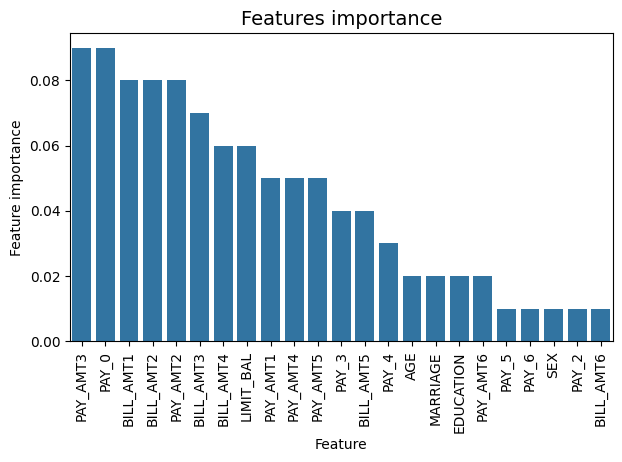

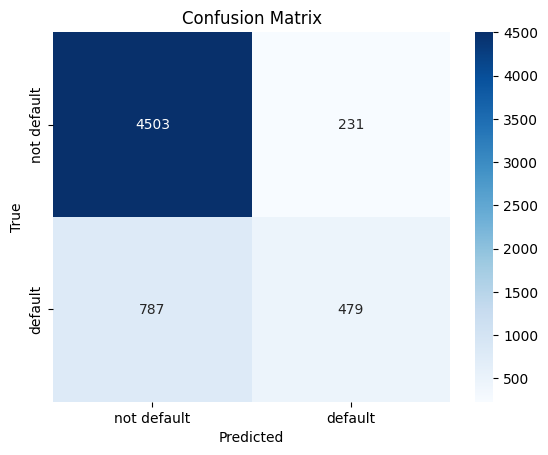

              precision    recall  f1-score   support

           0       0.85      0.95      0.90      4734
           1       0.67      0.38      0.48      1266

    accuracy                           0.83      6000
   macro avg       0.76      0.66      0.69      6000
weighted avg       0.81      0.83      0.81      6000

The ROC-AUC score obtained with RandomForrestClassifier is 0.6647805428912956


In [30]:
#拟合模型
clf.fit(train_df[predictors], train_df[target].values)
#预测
preds = clf.predict(val_df[predictors])
#同之前一样看特征的重要程度和混淆矩阵
# 可视化参数重要程度
tmp = pd.DataFrame({'Feature': predictors, 'Feature importance': clf.feature_importances_})
tmp = tmp.sort_values(by='Feature importance',ascending=False)
plt.figure(figsize = (7,4))
plt.title('Features importance',fontsize=14)
s = sns.barplot(x='Feature',y='Feature importance',data=tmp)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show() 
# 绘制confusion matrix
cm = cm = confusion_matrix(val_df[target], preds)
# 使用热力图来绘制混淆矩阵
labels = ['not default', 'default']
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',xticklabels=labels, yticklabels=labels)

# 设置标题和坐标轴标签

plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
print(classification_report(val_df[target], preds))
print('The ROC-AUC score obtained with AdaBoostClassifier is', roc_auc_score(val_df[target].values, preds))

## CatBoostClassifier ##

In [33]:
#初始化模型参数
clf = CatBoostClassifier(iterations=500,
                             learning_rate=0.02,
                             depth=12,
                             eval_metric='AUC',
                             random_seed = 2024,
                             bagging_temperature = 0.2,
                             od_type='Iter',
                             metric_period = 50,
                             od_wait=100)
#拟合模型
clf.fit(train_df[predictors], train_df[target].values,verbose=True)

0:	total: 306ms	remaining: 2m 32s
50:	total: 7.46s	remaining: 1m 5s
100:	total: 14.9s	remaining: 58.9s
150:	total: 22.1s	remaining: 51.2s
200:	total: 29.5s	remaining: 43.9s
250:	total: 37s	remaining: 36.7s
300:	total: 44.4s	remaining: 29.4s
350:	total: 51.9s	remaining: 22s
400:	total: 59.7s	remaining: 14.7s
450:	total: 1m 7s	remaining: 7.31s
499:	total: 1m 14s	remaining: 0us


C:\Users\James Han\AppData\Local\Temp\ipykernel_19628\1194700883.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  s.set_xticklabels(s.get_xticklabels(),rotation=90)


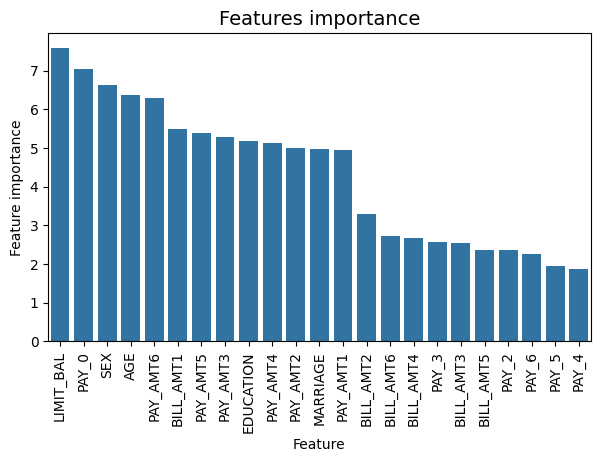

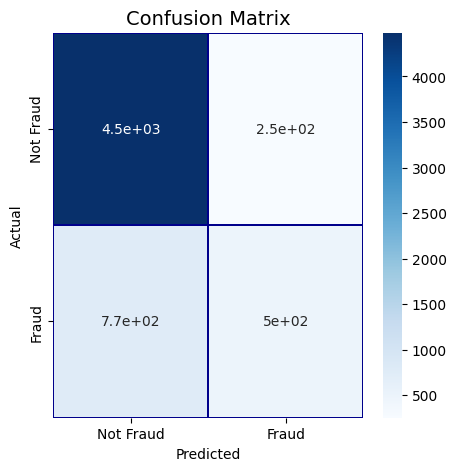

The ROC-AUC score obtained with CatBoostClassifier is 0.6698552570194038


In [35]:
#进行预测
preds = clf.predict(val_df[predictors])
#特征重要程度
tmp = pd.DataFrame({'Feature': predictors, 'Feature importance': clf.feature_importances_})
tmp = tmp.sort_values(by='Feature importance',ascending=False)
plt.figure(figsize = (7,4))
plt.title('Features importance',fontsize=14)
s = sns.barplot(x='Feature',y='Feature importance',data=tmp)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()   

#混淆矩阵
cm = pd.crosstab(val_df[target].values, preds, rownames=['Actual'], colnames=['Predicted'])
fig, (ax1) = plt.subplots(ncols=1, figsize=(5,5))
sns.heatmap(cm, 
            xticklabels=['Not Fraud', 'Fraud'],
            yticklabels=['Not Fraud', 'Fraud'],
            annot=True,ax=ax1,
            linewidths=.2,linecolor="Darkblue", cmap="Blues")
plt.title('Confusion Matrix', fontsize=14)
plt.show()
print('The ROC-AUC score obtained with CatBoostClassifier is', roc_auc_score(val_df[target].values, preds))